In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("diabetes.csv",index_col = False)
cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
data[cols] = data[cols].replace({ 0:np.nan})
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [2]:
data.isnull().sum(axis = 0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [3]:
values = data.values
values.shape

(768, 9)

In [4]:
y = values[:,8]

## SVD Iterative Imputer

In [5]:
from fancyimpute import IterativeSVD

In [6]:
X_filled_svd = IterativeSVD().complete(values)


[IterativeSVD] Iter 1: observed MAE=15.528603
[IterativeSVD] Iter 2: observed MAE=5.261947
[IterativeSVD] Iter 3: observed MAE=2.081545
[IterativeSVD] Iter 4: observed MAE=0.033681


In [7]:
pd.DataFrame(X_filled_svd)

,0,1,2,3,4,5,6,7,8
0,6.000000,148.0,72.000000,35.000000,89.060758,33.600000,0.627,50.0,1.0
1,1.000000,85.0,66.000000,29.000000,57.427730,26.600000,0.351,31.0,0.0
2,8.000000,183.0,64.000000,25.437816,97.129134,23.300000,0.672,32.0,1.0
3,1.000000,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0,0.0
4,3.224050,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0,1.0
5,5.000000,116.0,74.000000,25.685250,69.533779,25.600000,0.201,30.0,0.0
6,3.000000,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0,1.0
7,10.000000,115.0,60.090901,22.529073,55.362928,35.300000,0.134,29.0,0.0
8,2.000000,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0,1.0
9,8.000000,125.0,96.000000,28.824178,76.968281,36.302862,0.232,54.0,1.0


In [8]:
x = np.delete(X_filled_svd, 8, 1) 

LR: 0.765636 (0.051252)
LDA: 0.769549 (0.045738)
KNN: 0.718746 (0.064470)
CART: 0.696565 (0.064954)
NB: 0.746104 (0.038548)
SVM: 0.651025 (0.072141)


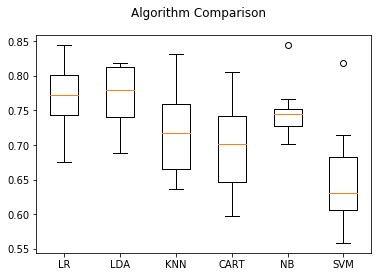

In [9]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## KNN Imputation

In [10]:
from fancyimpute import KNN
X_filled_knn = KNN(k=2).complete(values)

Imputing row 1/768 with 1 missing, elapsed time: 0.109
Imputing row 101/768 with 2 missing, elapsed time: 0.111
Imputing row 201/768 with 2 missing, elapsed time: 0.114
Imputing row 301/768 with 4 missing, elapsed time: 0.116
Imputing row 401/768 with 2 missing, elapsed time: 0.118
Imputing row 501/768 with 0 missing, elapsed time: 0.120
Imputing row 601/768 with 1 missing, elapsed time: 0.122
Imputing row 701/768 with 0 missing, elapsed time: 0.124


In [11]:
pd.DataFrame(X_filled_knn)

,0,1,2,3,4,5,6,7,8
0,6.000000,148.0,72.000000,35.000000,115.430016,33.600000,0.627,50.0,1.0
1,1.000000,85.0,66.000000,29.000000,89.586095,26.600000,0.351,31.0,0.0
2,8.000000,183.0,64.000000,25.629627,245.154297,23.300000,0.672,32.0,1.0
3,1.000000,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0,0.0
4,6.706661,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0,1.0
5,5.000000,116.0,74.000000,19.142691,110.714230,25.600000,0.201,30.0,0.0
6,3.000000,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0,1.0
7,10.000000,115.0,77.934099,36.997689,157.002391,35.300000,0.134,29.0,0.0
8,2.000000,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0,1.0
9,8.000000,125.0,96.000000,21.666060,215.751684,29.158226,0.232,54.0,1.0


In [12]:
x = np.delete(X_filled_knn, 8, 1) 

LR: 0.766917 (0.054063)
LDA: 0.774778 (0.044096)
KNN: 0.726640 (0.051016)
CART: 0.707006 (0.061645)
NB: 0.746121 (0.039762)
SVM: 0.651025 (0.072141)


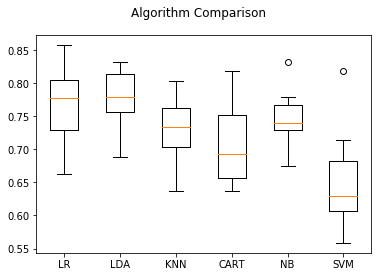

In [13]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## SOFT IMPUTATION

In [14]:
from fancyimpute import SoftImpute

In [15]:
X_filled_softimpute = SoftImpute().complete(values)


[SoftImpute] Max Singular Value of X_init = 5142.039102
[SoftImpute] Iter 1: observed MAE=2.136221 rank=6
[SoftImpute] Iter 2: observed MAE=2.167593 rank=6
[SoftImpute] Iter 3: observed MAE=2.188064 rank=6
[SoftImpute] Iter 4: observed MAE=2.202709 rank=6
[SoftImpute] Iter 5: observed MAE=2.215269 rank=6
[SoftImpute] Iter 6: observed MAE=2.225528 rank=6
[SoftImpute] Iter 7: observed MAE=2.233842 rank=6
[SoftImpute] Iter 8: observed MAE=2.240267 rank=6
[SoftImpute] Iter 9: observed MAE=2.244892 rank=6
[SoftImpute] Iter 10: observed MAE=2.248227 rank=6
[SoftImpute] Iter 11: observed MAE=2.250602 rank=6
[SoftImpute] Iter 12: observed MAE=2.252134 rank=6
[SoftImpute] Iter 13: observed MAE=2.253029 rank=6
[SoftImpute] Iter 14: observed MAE=2.253581 rank=6
[SoftImpute] Iter 15: observed MAE=2.253977 rank=6
[SoftImpute] Iter 16: observed MAE=2.254220 rank=6
[SoftImpute] Iter 17: observed MAE=2.254357 rank=6
[SoftImpute] Iter 18: observed MAE=2.254391 rank=6
[SoftImpute] Iter 19: observed MAE=

In [16]:
pd.DataFrame(X_filled_softimpute)

,0,1,2,3,4,5,6,7,8
0,6.000000,148.0,72.000000,35.000000,83.588310,33.600000,0.627,50.0,1.0
1,1.000000,85.0,66.000000,29.000000,49.912300,26.600000,0.351,31.0,0.0
2,8.000000,183.0,64.000000,26.022835,99.441730,23.300000,0.672,32.0,1.0
3,1.000000,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0,0.0
4,4.082650,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0,1.0
5,5.000000,116.0,74.000000,23.577365,64.799153,25.600000,0.201,30.0,0.0
6,3.000000,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0,1.0
7,10.000000,115.0,62.760725,26.815787,65.980826,35.300000,0.134,29.0,0.0
8,2.000000,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0,1.0
9,8.000000,125.0,96.000000,30.951528,70.853335,35.884873,0.232,54.0,1.0


In [17]:
x = np.delete(X_filled_softimpute, 8, 1) 

LR: 0.766917 (0.054416)
LDA: 0.774744 (0.045804)
KNN: 0.708373 (0.057353)
CART: 0.708305 (0.043750)
NB: 0.748701 (0.038504)
SVM: 0.651025 (0.072141)


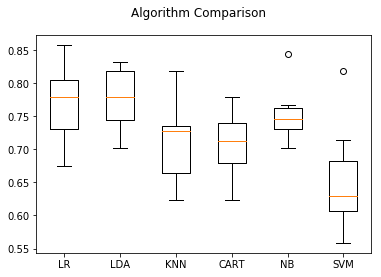

In [18]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Charge UP Imputation

In [19]:
from IMPT import ChargeUp

In [20]:
imputed_x = ChargeUp().fill_matrix(values)

 Max Singular Value of X_init = 5142.039102
 Iter 1: observed MAE=2.136221 rank=6
 Iter 2: observed MAE=2.167593 rank=6
 Iter 3: observed MAE=2.188064 rank=6
 Iter 4: observed MAE=2.202709 rank=6
 Iter 5: observed MAE=2.215269 rank=6
 Iter 6: observed MAE=2.225528 rank=6
 Iter 7: observed MAE=2.233842 rank=6
 Iter 8: observed MAE=2.240267 rank=6
 Iter 9: observed MAE=2.244892 rank=6
 Iter 10: observed MAE=2.248227 rank=6
 Iter 11: observed MAE=2.250602 rank=6
 Iter 12: observed MAE=2.252134 rank=6
 Iter 13: observed MAE=2.253029 rank=6
 Iter 14: observed MAE=2.253581 rank=6
 Iter 15: observed MAE=2.253977 rank=6
 Iter 16: observed MAE=2.254220 rank=6
 Iter 17: observed MAE=2.254357 rank=6
 Iter 18: observed MAE=2.254391 rank=6
 Iter 19: observed MAE=2.254403 rank=6
 Iter 20: observed MAE=2.254365 rank=6
 Iter 21: observed MAE=2.254286 rank=6
 Iter 22: observed MAE=2.254184 rank=6
 Iter 23: observed MAE=2.254063 rank=6
 Iter 24: observed MAE=2.253931 rank=6
 Iter 25: observed MAE=2.2537

In [21]:
pd.DataFrame(imputed_x)

,0,1,2,3,4,5,6,7,8
0,6.000000,148.0,72.000000,35.000000,83.588310,33.600000,0.627,50.0,1.0
1,1.000000,85.0,66.000000,29.000000,49.912300,26.600000,0.351,31.0,0.0
2,8.000000,183.0,64.000000,26.022835,99.441730,23.300000,0.672,32.0,1.0
3,1.000000,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0,0.0
4,4.082650,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0,1.0
5,5.000000,116.0,74.000000,23.577365,64.799153,25.600000,0.201,30.0,0.0
6,3.000000,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0,1.0
7,10.000000,115.0,62.760725,26.815787,65.980826,35.300000,0.134,29.0,0.0
8,2.000000,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0,1.0
9,8.000000,125.0,96.000000,30.951528,70.853335,35.884873,0.232,54.0,1.0


In [22]:
x = np.delete(imputed_x, 8, 1) 

LR: 0.766917 (0.054416)
LDA: 0.774744 (0.045804)
KNN: 0.708373 (0.057353)
CART: 0.691285 (0.064281)
NB: 0.748701 (0.038504)
SVM: 0.651025 (0.072141)


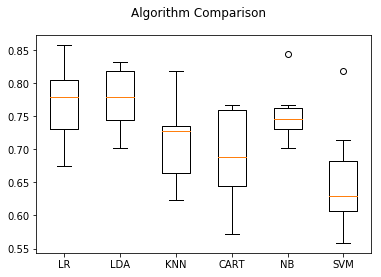

In [23]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## IMPUTATION With Zero

In [24]:
data = pd.read_csv("diabetes.csv",index_col = False)
values = data.values
x = values[:,0:8]
y = values[:,8]

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.678349 (0.053778)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


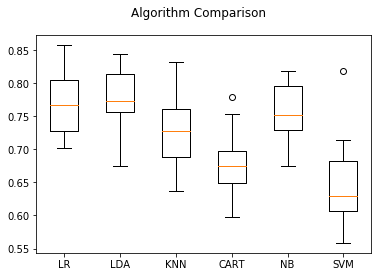

In [25]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()